In [1]:
pip install -U cellxgene-census

In [2]:
pip install -U cellxgene-census[experimental]

In [3]:
import cellxgene_census

help(cellxgene_census)
help(cellxgene_census.get_anndata)

/usr/local/lib/python3.10/dist-packages/tiledb/cloud/config.py:96: UserWarning: You must first login before you can run commands. Please run tiledb.cloud.login.
  warnings.warn(


Help on package cellxgene_census:

NAME
    cellxgene_census - An API to facilitate use of the CZI Science CELLxGENE Census. The Census is a versioned container of single-cell data hosted at `CELLxGENE Discover`_.

DESCRIPTION
    The API is built on the `tiledbsoma` SOMA API, and provides a number of helper functions including:
    
        * Open a named version of the Census, for use with the SOMA API
        * Get a list of available Census versions, and for each version, a description
        * Get a slice of the Census as an AnnData, for use with ScanPy
        * Get the URI for, or directly download, underlying data in H5AD format
    
    For more information on the API, visit the `cellxgene_census repo`_. For more information on SOMA, see the `tiledbsoma repo`_.
    
    .. _CELLxGENE Discover:
        https://cellxgene.cziscience.com/
    
    .. _cellxgene_census repo:
        https://github.com/chanzuckerberg/cellxgene-census/
    
    .. _tiledbsoma repo:
        https://g

In [4]:
import cellxgene_census

with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


            assay        cell_type                          tissue  \
0       10x 5' v1           neuron                            lung   
1       10x 5' v1           neuron                            lung   
2       10x 5' v1           neuron                            lung   
3       10x 5' v1           neuron                            lung   
4       10x 5' v1           neuron                            lung   
...           ...              ...                             ...   
732776  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732777  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732778  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732779  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732780  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   

       tissue_general suspension_type   disease     sex  
0                lung            cell    normal  female  
1                lung            cell    no

In [11]:
!pip install scanpy
import urllib
import scanpy as sc

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [6]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [7]:
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))

print("\nMapping from gene ID to gene name (first 20 mappings):")
for gene_id, gene_name in list(gene_mapping.items())[:20]:
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


Mapping from gene ID to gene name (first 20 mappings):
Gene ID: ENSG00000278915, Gene Name: ENSG00000278915.1
Gene ID: ENSG00000168454, Gene Name: TXNDC2
Gene ID: ENSG00000139180, Gene Name: NDUFA9
Gene ID: ENSG00000229177, Gene Name: ENSG00000229177.1
Gene ID: ENSG00000204564, Gene Name: C6orf136
Gene ID: ENSG00000116717, Gene Name: GADD45A
Gene ID: ENSG00000254418, Gene Name: SPON1-AS1
Gene ID: ENSG00000114654, Gene Name: EFCC1
Gene ID: ENSG00000257894, Gene Name: ENSG00000257894.2
Gene ID: ENSG00000198398, Gene Name: TMEM207
Gene ID: ENSG00000085117, Gene Name: CD82
Gene ID: ENSG00000092140, Gene Name: G2E3
Gene ID: ENSG00000257008, Gene Name: GPR142
Gene ID: ENSG00000125877, Gene Name: ITPA
Gene ID: ENSG00000170430, Gene Name: MGMT
Gene ID: ENSG00000231662, Gene Name: ENSG00000231662.1
Gene ID: ENSG00000140853, Gene Name: NLRC5
Gene ID: ENSG00000261198, Gene Name: ENSG00000261198.1
Gene ID: ENSG00000185610, Gene Name: DBX2
Gene ID: ENSG00000171475, Gene Name: WIPF2


In [8]:
# Extract and display the values under each attribute in obs
for obs_attr in adata.obs.columns:
    print(f"\nValues for obs attribute '{obs_attr}':")
    print(adata.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata.var.columns:
    print(f"\nValues for var attribute '{var_attr}':")
    print(adata.var[var_attr].values)


Values for obs attribute 'nCount_RNA':
[ 927. 1251. 2972. ... 5511. 9837. 6275.]

Values for obs attribute 'nFeature_RNA':
[ 694  886 1695 ... 2269 3440 2510]

Values for obs attribute 'percent.mt':
[1.83387271 6.47482014 0.20188425 ... 6.06060606 3.15136729 1.56175299]

Values for obs attribute 'SORT':
['MAP2', 'MAP2', 'MAP2', 'MAP2', 'MAP2', ..., 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control']
Length: 23197
Categories (3, object): ['AT8', 'MAP2', 'MAP2control']

Values for obs attribute 'Amyloid':
['C3', 'C3', 'C3', 'C3', 'C3', ..., 'No', 'No', 'No', 'No', 'No']
Length: 23197
Categories (3, object): ['C3', 'DP (C0)', 'No']

Values for obs attribute 'Age':
['73', '73', '73', '73', '73', ..., '71', '71', '71', '71', '71']
Length: 23197
Categories (14, object): ['57', '61', '62', '66', ..., '81', '87', '89', '93']

Values for obs attribute 'RIN':
['5.7', '5.7', '5.7', '5.7', '5.7', ..., '6.5', '6.5', '6.5', '6.5', '6.5']
Length: 23197
Categories (10, object):

In [27]:
# Define key genes related to inflammation and stress response
inflammation_genes = ['ENSG00000115415', 'ENSG00000164332', 'ENSG00000171766']  # Example inflammation-related genes
stress_genes = ['ENSG00000204389', 'ENSG00000162772', 'ENSG00000170345']  # Example stress-related genes


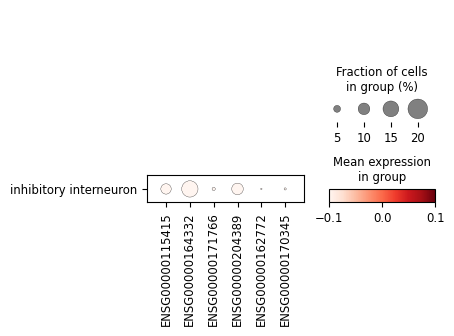

In [28]:
# Analyze gene expression patterns across different cell types
sc.pl.dotplot(adata, var_names=inflammation_genes + stress_genes, groupby="cell_type", standard_scale="var")


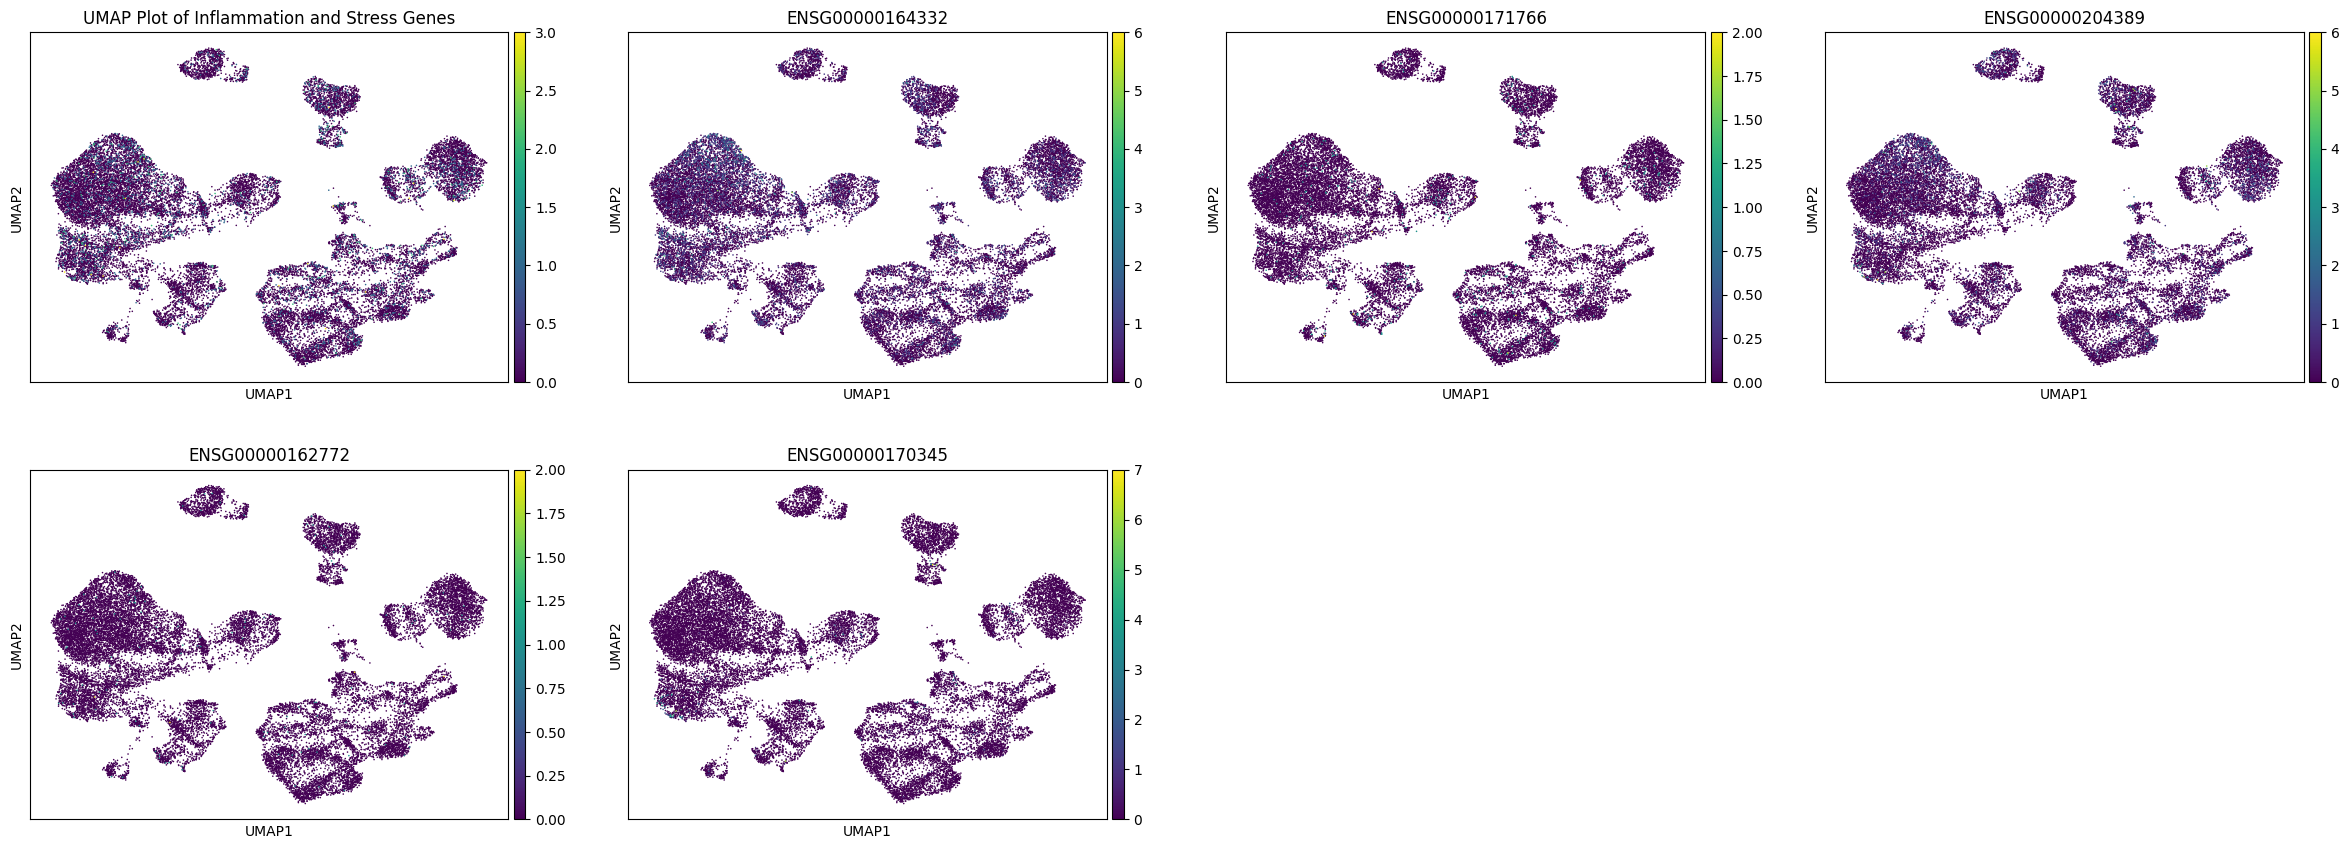

In [34]:
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Plot UMAP with highlighted genes of interest
sc.pl.umap(adata, color=['ENSG00000115415', 'ENSG00000164332', 'ENSG00000171766', 'ENSG00000204389', 'ENSG00000162772', 'ENSG00000170345'],
            title="UMAP Plot of Inflammation and Stress Genes")



In [29]:
print("Average expression levels of inflammation and stress genes across cell types:")
for gene in inflammation_genes + stress_genes:
    print(f"{gene}: {adata[:, gene].X.mean()}")

Average expression levels of inflammation and stress genes across cell types:
ENSG00000115415: 0.09830640256404877
ENSG00000164332: 0.19154565036296844
ENSG00000171766: 0.022438358515501022
ENSG00000204389: 0.12960772216320038
ENSG00000162772: 0.007017944939434528
ENSG00000170345: 0.013448633253574371
